<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/PolynomialLinearRegression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Real estate valuation data set.xlsx to Real estate valuation data set (1).xlsx
   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2  

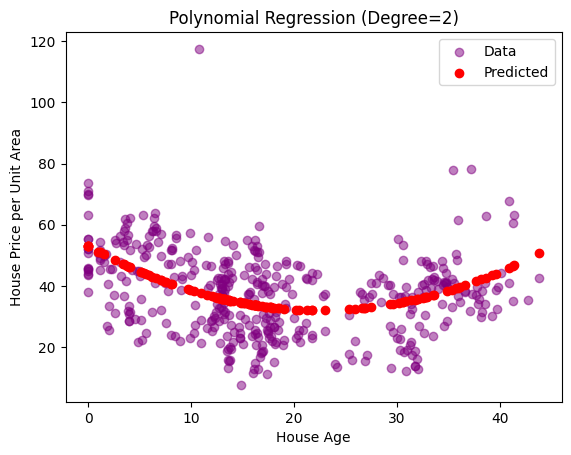

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Upload Excel file
uploaded = files.upload()

# Load dataset
df = pd.read_excel("Real estate valuation data set.xlsx")

# Check first few rows
print(df.head())

# Choose feature (independent variable) and target (dependent variable)
# X2 = house age, Y = house price of unit area
X = df[["X2 house age"]].values
y = df["Y house price of unit area"].values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transform using polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluate
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.scatter(X, y, color="purple", alpha=0.5, label="Data")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("House Age")
plt.ylabel("House Price per Unit Area")
plt.title("Polynomial Regression (Degree=2)")
plt.legend()
plt.show()


In [6]:
!pip install kagglehub --upgrade

# Import
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.12
    Uninstalling kagglehub-0.3.12:
      Successfully uninstalled kagglehub-0.3.12
Using Colab cache for faster access to the 'diabetes-data-set' dataset.
Path to dataset files: /kaggle/input/diabetes-data-set


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

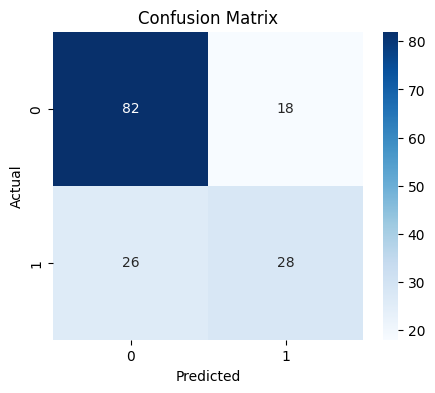

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2: Load dataset from path
csv_path = os.path.join(path, "diabetes.csv")  # update if filename differs
data = pd.read_csv(csv_path)

# Step 3: Explore dataset
print(data.head())
print(data.info())
print(data.describe())

# Step 4: Split features (X) and target (y)
X = data.drop("Outcome", axis=1)   # Features
y = data["Outcome"]               # Target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Weight Reduction Example
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset
np.random.seed(42)
n = 200
data = pd.DataFrame({
    "Age": np.random.randint(18, 60, n),
    "Height": np.random.randint(150, 190, n),
    "Weight": np.random.randint(50, 100, n),
    "TimeOnExercise": np.random.randint(1, 10, n)
})

# Define WeightReduction (target) with some randomness
data["WeightReduction"] = (
    0.2 * data["Age"] +
    0.5 * data["Height"] -
    0.3 * data["Weight"] +
    1.5 * data["TimeOnExercise"] +
    np.random.randn(n) * 10
)

# Features & target
X = data[["Age", "Height", "Weight", "TimeOnExercise"]]
y = data["WeightReduction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Coefficients: [ 0.27644055  0.3449112  -0.23916824  1.4001403 ]
Intercept: 19.224897636744295
R² Score: 0.5014337821738961
MSE: 116.02045027686037
